# Support Vector Machines

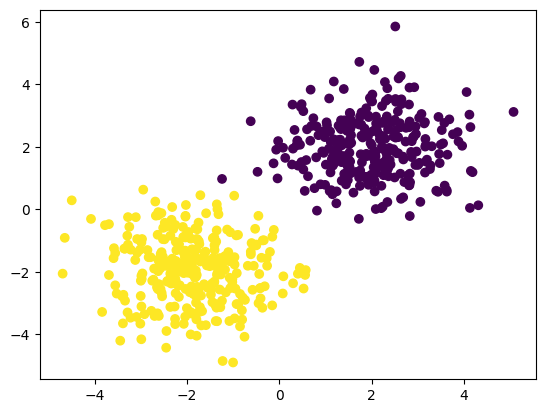

In [8]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

blobs = make_blobs(n_samples=[300,300], n_features=2, centers=[(2,2), (-2,-2)], cluster_std=1.0, random_state=42)

plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])

<Axes: xlabel='X1', ylabel='X2'>

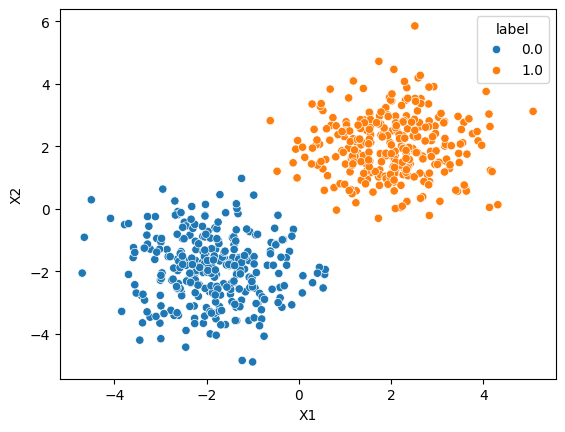

In [11]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(blobs[0])
# After fitting, you can add the labels to blobs as a new column.
blobs_with_labels = np.c_[blobs[0], kmeans.labels_]

df = pd.DataFrame(blobs_with_labels, columns=['X1', 'X2', 'label'])

sns.scatterplot(x='X1', y='X2', hue='label', data=df)


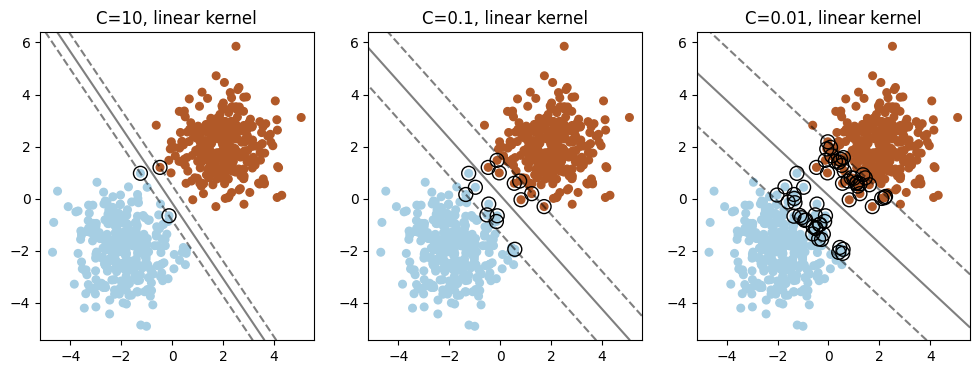

In [12]:
from utils import plot_svm_margins
from sklearn.svm import SVC, LinearSVC

X, y = df.drop('label', axis=1).to_numpy(), df['label'].to_numpy()
fig,ax = plt.subplots(1,3, dpi=100, figsize=(12,4))

for i , C in enumerate([10,0.1,0.01], 1):
    plt.subplot(1,3,i)
    plot_svm_margins(SVC(kernel='linear', C=C).fit(X, y), X, y)
    ax[i-1].set_title(f'C={C}, linear kernel')

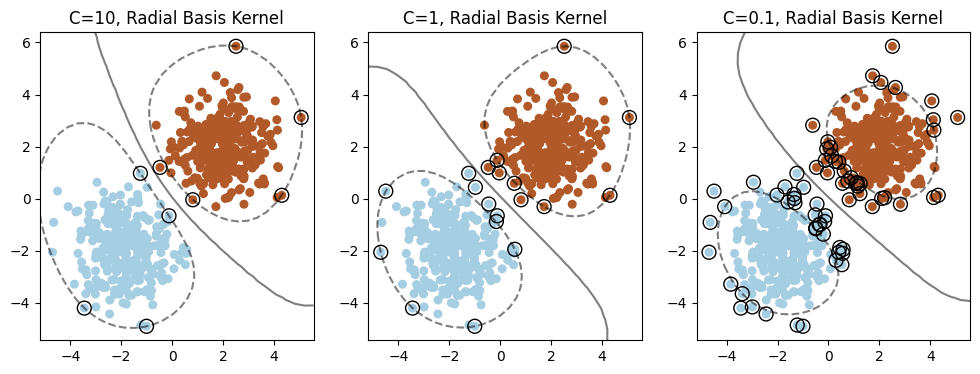

In [14]:
from utils import plot_svm_margins
from sklearn.svm import SVC, LinearSVC

X, y = df.drop('label', axis=1).to_numpy(), df['label'].to_numpy()
fig,ax = plt.subplots(1,3, dpi=100, figsize=(12,4))

for i , C in enumerate([10,1,0.1], 1):
    plt.subplot(1,3,i)
    plot_svm_margins(SVC(kernel='rbf', C=C).fit(X, y), X, y)
    ax[i-1].set_title(f'C={C}, Radial Basis Kernel')

Mindre fitting ju lägre C ovan ser vi. Kollapsar ner hyperplan i högre dimensioner det till två dimensioner på slutet, så blir det blobbar.

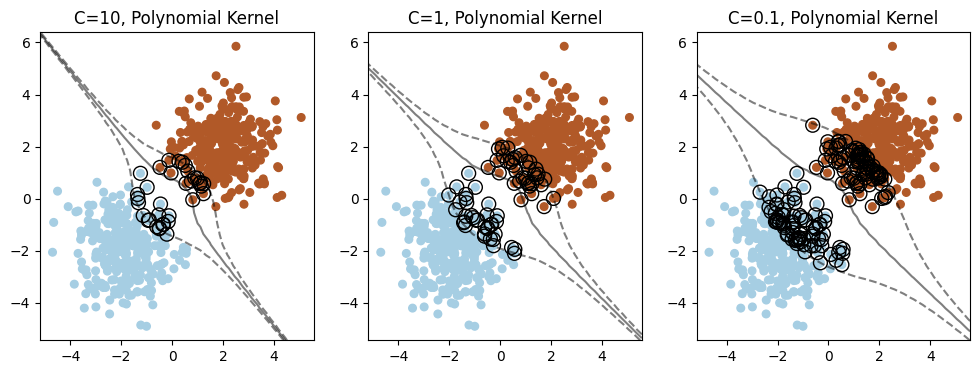

In [15]:
from utils import plot_svm_margins
from sklearn.svm import SVC, LinearSVC

X, y = df.drop('label', axis=1).to_numpy(), df['label'].to_numpy()
fig,ax = plt.subplots(1,3, dpi=100, figsize=(12,4))

for i , C in enumerate([10,1,0.1], 1):
    plt.subplot(1,3,i)
    plot_svm_margins(SVC(kernel='poly', C=C).fit(X, y), X, y)
    ax[i-1].set_title(f'C={C}, Polynomial Kernel')

Högre C innebär högre regularisering. I detta fall ser vi att högre C ger bättre resultat, men att det inte var så imponerande överlag. 

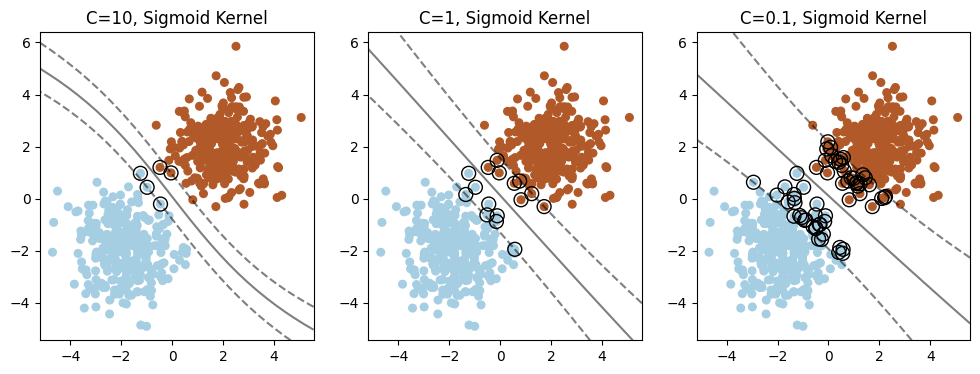

In [17]:
from utils import plot_svm_margins
from sklearn.svm import SVC, LinearSVC

X, y = df.drop('label', axis=1).to_numpy(), df['label'].to_numpy()
fig,ax = plt.subplots(1,3, dpi=100, figsize=(12,4))

for i , C in enumerate([10,1,0.1], 1):
    plt.subplot(1,3,i)
    plot_svm_margins(SVC(kernel='sigmoid', C=C).fit(X, y), X, y)
    ax[i-1].set_title(f'C={C}, Sigmoid Kernel')

Blir S-kurvor (sigmoid). Den går nog inte ens upp i högre dimensioner. 

Det verkar inte som att sklearn brytt sig om att implementera några andra än SGD. T.ex. minibatch. De finns bara i deras neurala nätverk-bibliotek. 